$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [100]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [101]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [102]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [103]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [104]:
#now call evalf (x) with my_x as argument and check if it works
print(evalf(my_x))

10730


In [105]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [106]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals, k 


In [107]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret, iters = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

Optimizer: [-99.99958844  24.99994388]


In [108]:
print('Minimizer:',opt_x)
print('Minimum function value:',fvals_ret[-1])

Minimizer: [-99.99958844  24.99994388]
Minimum function value: 1.7253033717248775e-07


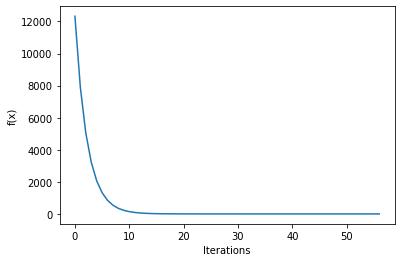

In [109]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

**Code for answer 3**

In [110]:
my_start_x = np.array([10,10])
my_steplength = 0.1
iter_list=[]
tau=[]
print('Tolerance values'+'\t\t'+'Minimizer'+'        \t\t\t'+'Minimum function value'+'\t\t'+'Number of iterations taken by algorithm to terminate')
for p in range(10): 
  my_tol= float(10**(-(p+1)))
  tau.append(my_tol)
  opt_x, fvals_ret, iters = find_minimizer(my_start_x, my_tol, my_steplength)
  iter_list.append(iters)
  print(tau[p],'    \t\t',opt_x,'    \t\t',fvals_ret[-1],'    \t',iters)

Tolerance values		Minimizer        			Minimum function value		Number of iterations taken by algorithm to terminate
0.1     		 [-99.9553787   24.99391528]     		 0.0020280843668995063     	 35
0.01     		 [-99.99520882  24.99934666]     		 2.3382220797474075e-05     	 45
0.001     		 [-99.99958844  24.99994388]     		 1.7253033717248775e-07     	 56
0.0001     		 [-99.99995581  24.99999397]     		 1.989139359193299e-09     	 66
1e-05     		 [-99.99999526  24.99999935]     		 2.293321544605827e-11     	 76
1e-06     		 [-99.99999959  24.99999994]     		 1.6921726745458407e-13     	 87
1e-07     		 [-99.99999996  24.99999999]     		 1.950942200128245e-15     	 97
1e-08     		 [-100.   25.]     		 2.249273021138356e-17     	 107
1e-09     		 [-100.   25.]     		 1.6597088735501767e-19     	 118
1e-10     		 [-100.   25.]     		 1.9135732950098918e-21     	 128


In [111]:
print(iter_list)

[35, 45, 56, 66, 76, 87, 97, 107, 118, 128]


In [112]:
print(tau)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]


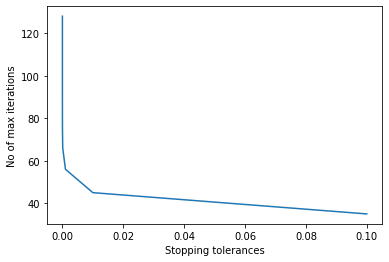

In [113]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(tau, iter_list)
plt.ylabel('No of max iterations')
plt.xlabel('Stopping tolerances')
plt.show()

**Code for answer 4**

In [114]:
my_start_x = np.array([10,10])
my_tol= 1e-5
iter_list2=[]
step_list=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
print('Step length'+'       \t'+'Minimizer'+'\t\t\t'+'Minimum function value'+'   \t'+'Number of iterations taken by algorithm to terminate')
for p in range(11):
  opt_x, fvals_ret, iters = find_minimizer(my_start_x, my_tol, step_list[p])
  iter_list2.append(iters)
  print(step_list[p],'    \t',opt_x,'\t\t',fvals_ret[-1],'    \t',iters)

Step length       	Minimizer			Minimum function value   	Number of iterations taken by algorithm to terminate
0.0001     	 [-99.99999505  24.99999932] 		 2.49936770204995e-11     	 84571
0.001     	 [-99.99999505  24.99999933] 		 2.494219709847674e-11     	 8450
0.01     	 [-99.99999512  24.99999933] 		 2.4304673044883465e-11     	 838
0.1     	 [-99.99999526  24.99999935] 		 2.293321544605827e-11     	 76
0.2     	 [-99.99999685  24.99999957] 		 1.011747066175869e-11     	 34
0.4     	 [-99.99999775  24.99999969] 		 5.169479687800271e-12     	 11
0.5     	 [-100.   25.] 		 0.0     	 1
0.6     	 [-100.00000225   25.00000031] 		 5.169479687800271e-12     	 11
0.7     	 [-100.00000302   25.00000041] 		 9.312506683476372e-12     	 19
0.8     	 [-99.99999685  24.99999957] 		 1.011747066175869e-11     	 34
0.9     	 [-99.99999526  24.99999935] 		 2.293321544605827e-11     	 76


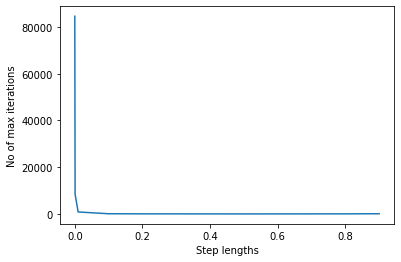

In [115]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(step_list, iter_list2)
plt.ylabel('No of max iterations')
plt.xlabel('Step lengths')
plt.show()

**Code for answer 5**

In [116]:
my_step_length=0.1
my_tol= 1e-5
my_start_x=np.array([(10000, 10000),(500, 0),(0, 1000),(1, 1),(-500, -2)])
print('Starting point'+'        \t\t'+'Minimizer'+'\t\t\t'+'Minimum function value'+'   \t'+'Number of iterations taken by algorithm to terminate')
for p in range(5):
  opt_x, fvals_ret, iters = find_minimizer(my_start_x[p], my_tol, my_step_length)
  print(my_start_x[p],'      \t',opt_x,'\t\t',fvals_ret[-1],'    \t',iters)                                                                                                                  

Starting point        		Minimizer			Minimum function value   	Number of iterations taken by algorithm to terminate
[10000 10000]       	 [-99.99999679  25.00000317] 		 2.0414342669998657e-11     	 98
[500   0]       	 [-99.99999566  24.99999982] 		 1.888746375147865e-11     	 84
[   0 1000]       	 [-99.99999954  25.00000452] 		 2.060780080476227e-11     	 86
[1 1]       	 [-99.99999564  24.99999896] 		 2.0052840841640608e-11     	 76
[-500   -2]       	 [-100.00000452   24.99999969] 		 2.055190630073527e-11     	 82


Answer 2) 

Minimizer: [-99.99958844  24.99994388]

Minimum function value: 1.7253033717248775e-07

Answer 3) We can observe that as the stopping tolerance values decrease, the number of iterations taken by the algorithm to terminate increase but we get a more accurate solution as minimum function value decreases with decrease in stopping tolerance values. Also, both x and y coordinate values of the final minimizer is seen to be increasing with decrease in stopping tolerance values.

Answer 4) We can observe that as the step lengths increase, the number of iterations taken by the algorithm to terminate decrease or remains same till step length 0.6 after which it starts increasing. Minimum function value decreases till step length 0.5 after which it starts increasing. Both x and y coordinate values of the final minimizer is seen to be increasing with decrease in step lengths till 0.7 after which they both start decreasing.

Answer 5) The closer the starting point is to the final minimizer, the less number of iterations are taken by the algorithm to terminate. Minimum function value and value of minimizer almost remain the same with slight decrease or increase but no general trend is seen.